In [6]:
import numpy as np # Used for linear algebra
import pandas as pd # Used for data processing, csv in & out handling

# Reading the csv files in as pandas databases
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

# Showing the first 15 rows of the testData database aka test.csv file
trainData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Machine Learning with a Random Forest Model

This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

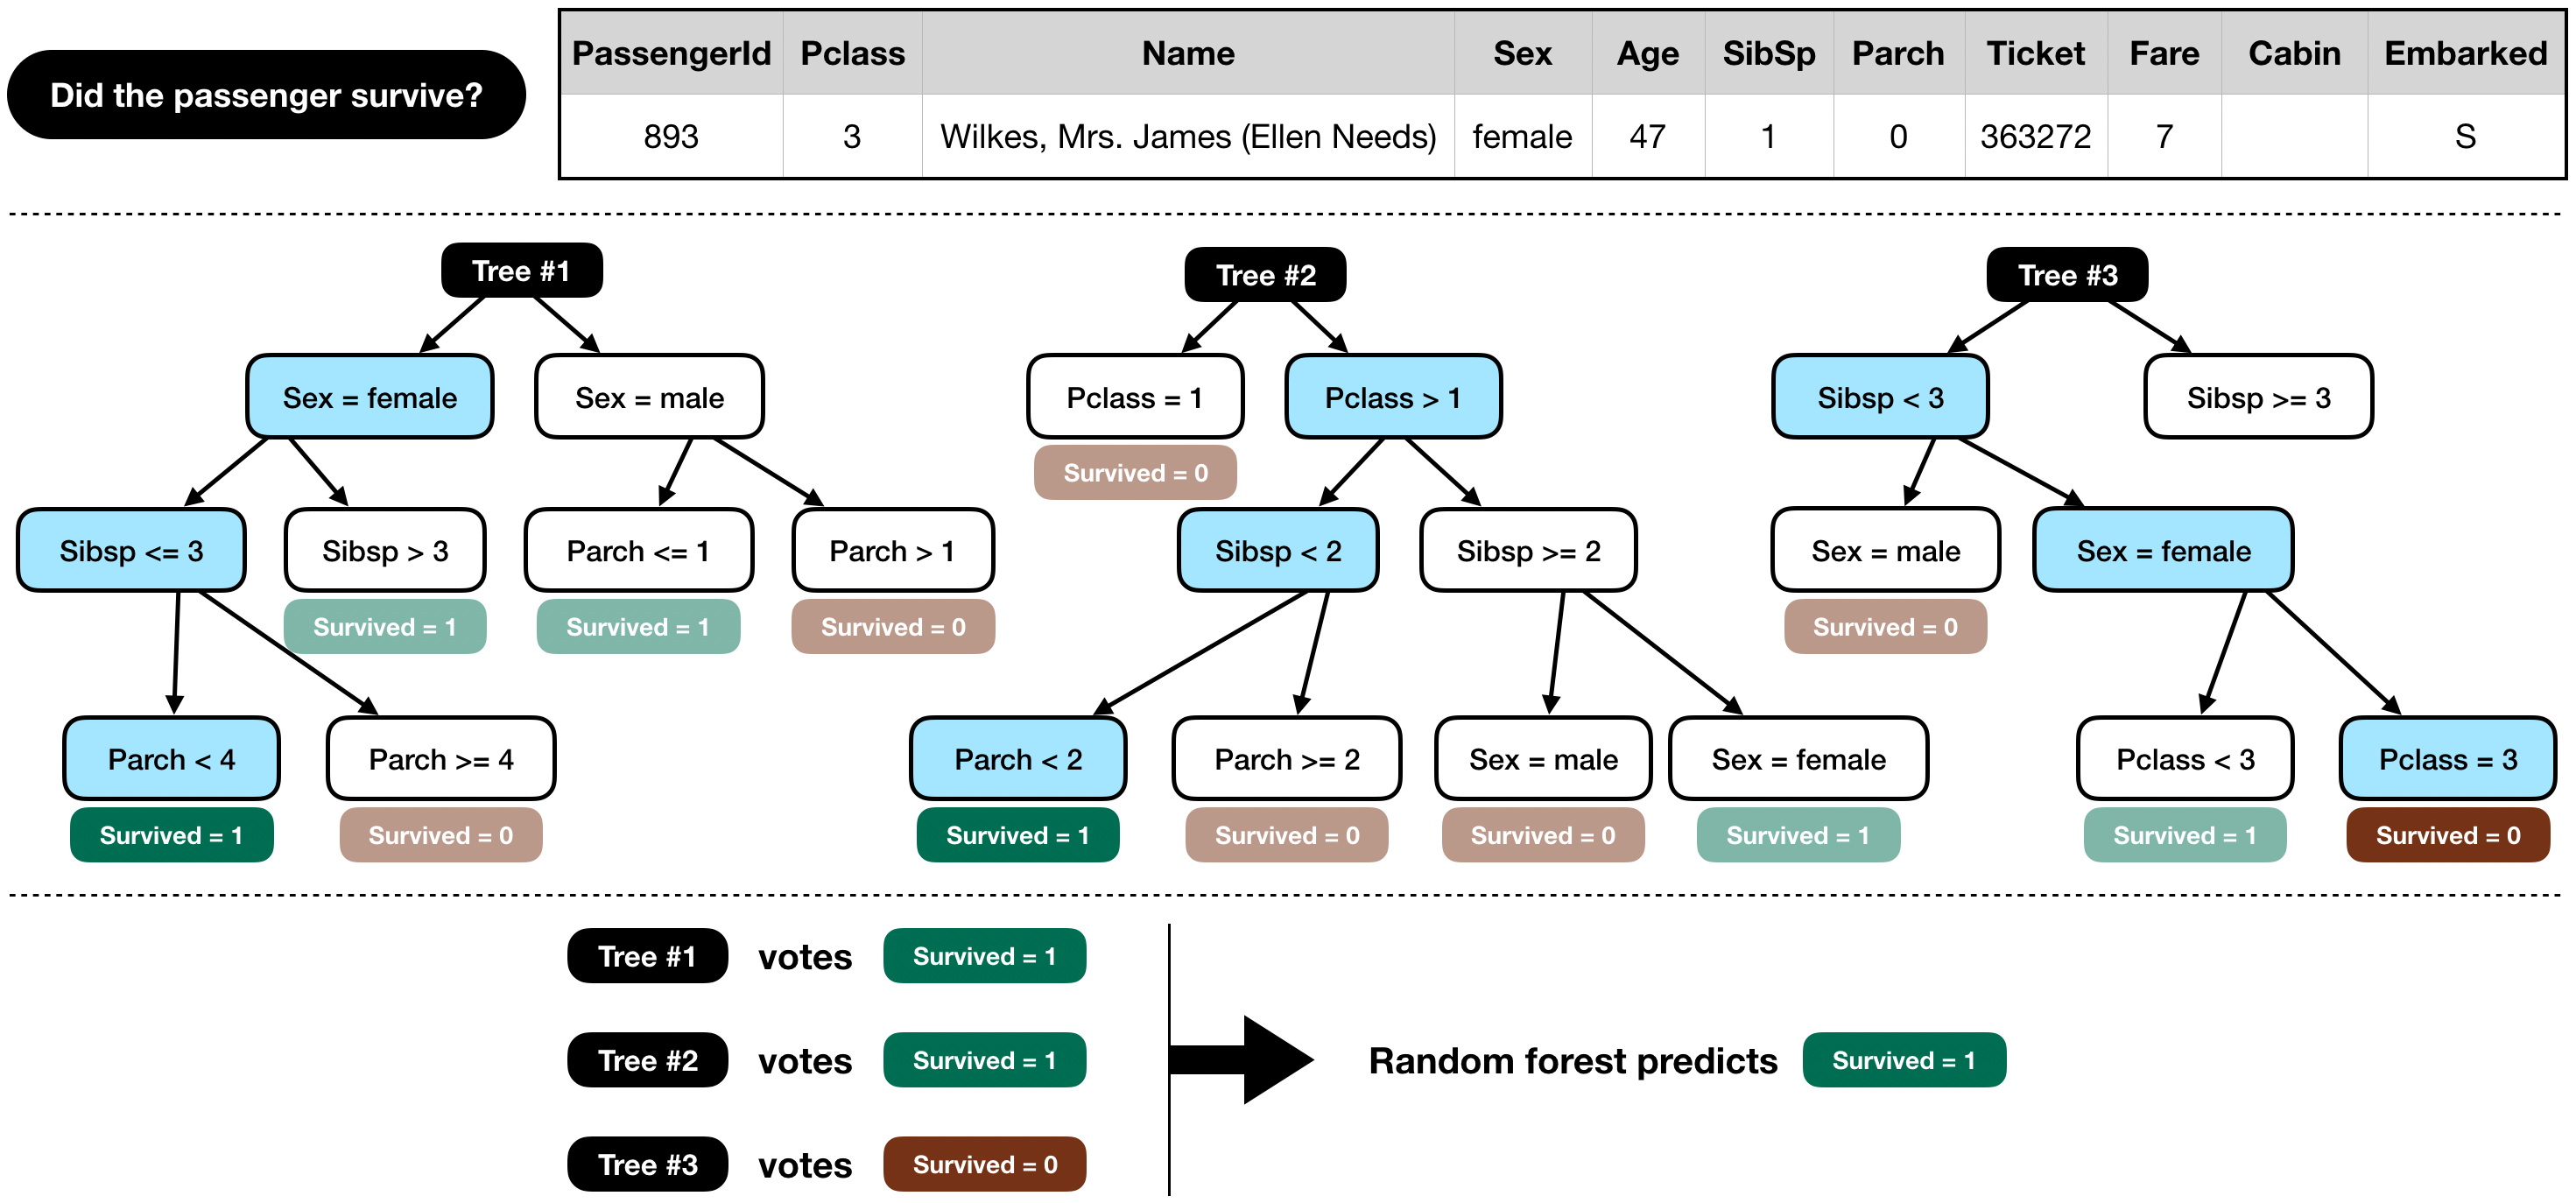

In [15]:
from sklearn.ensemble import RandomForestClassifier

y = trainData["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(trainData[features])
X_test = pd.get_dummies(testData[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': predictions})
output.to_csv("submission.csv", index = False) # We could sumbit this csv file here, but we can go a step further
output.head(25)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [2]:
# Below I check how many people in the datasets have ages listed
ageList = list(trainData["Age"])
ageNum = [x for x in ageList if x > 0]
ageNan = [x for x in ageList if x not in ageNum]

ageTest = list(testData["Age"])
ageTestNum = [x for x in ageTest if x > 0]
ageTestNan = [x for x in ageTest if x not in ageTestNum]

print(len(ageList)) # Number of people in the Train data
print(len(ageNum)) # Number of people in the Train data with a listed age
print(len(ageNan)) # Number of people in the Train data without a listed age
print() # (Blank line)
print(len(ageTest)) # Number of people in the Test data
print(len(ageTestNum)) # Number of people in the Test data with a listed age
print(len(ageTestNan)) # Number of people in the Test data without a listed age

# Now we can train a new model that considers ages
ageTrainData = trainData.dropna(subset = "Age") # Dropping everyone in trainData without an age
ageTestData = testData.dropna(subset = "Age") # Dropping everyone in testData without an age
ageTestData.head(15) # Show the first 15 rows of ageTestData

891
714
177

418
332
86


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
testDataNA = testData['PassengerId','Age'].dropna(how='any')

In [13]:
# Running another random forest with our age test data
y = ageTrainData["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(ageTrainData[features])
X_test = pd.get_dummies(ageTestData[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

outputAge = pd.DataFrame({'PassengerId': ageTestData.PassengerId, 'Survived': predictions}) # Saving 
outputAge.head(25)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [51]:
output.to_csv("submission.csv", index = False)

In [14]:
#submission = pd.merge(left=output, right=outputAge, on='PassengerId')
submission = output.copy()
submission.update(outputAge)
submission = submission.astype(int)
submission.head(25)
# submission.to_csv('submission.csv',index = False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [44]:
output.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [43]:
outputAge.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [21]:
nameList = list(trainData["Name"])
drList = []
for name in nameList:
    if "Miss." in name:
        drList.append(name)
print(drList)
print(len(drList))

['Heikkinen, Miss. Laina', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Vestrom, Miss. Hulda Amanda Adolfina', 'McGowan, Miss. Anna "Annie"', 'Palsson, Miss. Torborg Danira', 'O\'Dwyer, Miss. Ellen "Nellie"', 'Glynn, Miss. Mary Agatha', 'Vander Planke, Miss. Augusta Maria', 'Nicola-Yarred, Miss. Jamila', 'Laroche, Miss. Simonne Marie Anne Andree', 'Devaney, Miss. Margaret Delia', "O'Driscoll, Miss. Bridget", 'Rugg, Miss. Emily', 'West, Miss. Constance Mirium', 'Icard, Miss. Amelie', 'Andersson, Miss. Erna Alexandra', 'Goodwin, Miss. Lillian Amy', 'Dowdell, Miss. Elizabeth', 'McDermott, Miss. Brigdet Delia', 'Ilett, Miss. Bertha', 'Fortune, Miss. Mabel Helen', 'Petranec, Miss. Matilda', 'Salkjelsvik, Miss. Anna Kristine', 'Moran, Miss. Bertha', 'Zabour, Miss. Hileni', 'Jussila, Miss. Katriina', 'Attalah, Miss. Malake', 'Andersson, Miss. Ellis Anna Maria', 'Webber, Miss. Susan', 'Peter, Miss. Anna', 'Newsom, Miss. Helen Monypeny', 'Nysten, Miss. Anna Sofia', 'Ford, Mis